# Intro to Data Structures

In [80]:
'''
Jupyter notebook for learning Pandas methodically through the documentation. This one is from 'Intro to Data Structues'.
'''

"\nJupyter notebook for learning Pandas methodically through the documentation. This one is from 'Intro to Data Structues'.\n"

In [81]:
# http://pandas.pydata.org/pandas-docs/stable/dsintro.html
# https://medium.com/dunder-data/how-to-learn-pandas-108905ab4955

from ipywidgets import widgets
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Messing around with widgets

In [82]:
'''
Make a text box
'''

text = widgets.Play()
display(text)

def handle_submit(sender):
    print(text.value)

'\nMake a text box\n'

A Jupyter Widget

## Matplotlib 

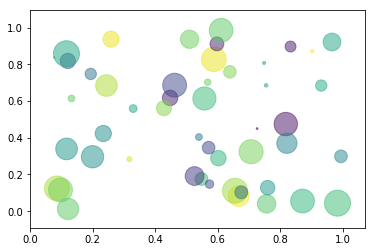

In [83]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

## Series

In [84]:
n = np.array([1, 2, 3])
s = pd.Series(n)
n; s  # Show as ndarray and series

array([1, 2, 3])

0    1
1    2
2    3
dtype: int32

#### From ndarray

0    45.307567
1    38.020040
2    48.488498
3    49.795490
4    57.885040
Name: test, dtype: float64

45.307567475761218

RangeIndex(start=0, stop=5, step=1)

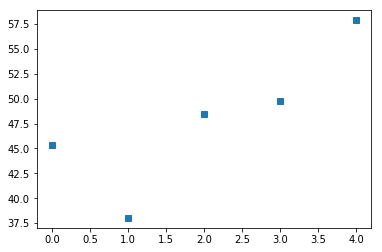

In [85]:
#  Make a series from a numpy array and plot it

s = pd.Series(10 * np.random.randn(5) + 50, name='test')
n = 10 * np.random.randn(100) + 50
s2 = pd.Series(n)
df = pd.DataFrame(s2)  # Show what we've got in our data structures now

plt.plot(s, 's')
s
s[0]; s.index

#### From dict

In [86]:
#  You can rearrange elements with index kwarg
d = {'a': 0., 'b': 1., 'c': 2.}
pd.Series(d)

pd.Series(d, index=['b', 'c', 'd', 'a'])

d

a    0.0
b    1.0
c    2.0
dtype: float64

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

{'a': 0.0, 'b': 1.0, 'c': 2.0}

#### From scalar

In [87]:
#  You can make a Series from a single value and it'll just repeat
pd.Series(5, index=['a', 'b', 'c', 'd', 'e'])

a    5
b    5
c    5
d    5
e    5
dtype: int64

### Series is ndarray-like 

#### Only difference is that things like slicing also slice the index

In [88]:

s
s[0]
s[:3]
s.mean()
s[s<s.mean()]

0    45.307567
1    38.020040
2    48.488498
3    49.795490
4    57.885040
Name: test, dtype: float64

45.307567475761218

0    45.307567
1    38.020040
2    48.488498
Name: test, dtype: float64

47.899327007502336

0    45.307567
1    38.020040
Name: test, dtype: float64

In [92]:
#  Let's get a more interesting dataset
df = pd.read_csv(r'C:\Users\Alex Loftus\Dropbox\Programming\Projects\Jupyter-Notebooks\Chase-acct-info\Checking-11-23-2017.CSV')
bal = df['Balance']
amt = df['Amount']

df.head()
amt = pd.to_numeric(amt)
inc = amt[amt>0]  # All income
spn = amt[amt<0].abs()
spn = spn[spn<200]  # Spending less than $200
spn.head(10)
spn.describe()
spn[spn<spn.mean()].count() / spn[spn>spn.mean()].count()  # Ratio of spn.count() less than mean to spn.count() greater than mean

#  spn = all spending < $200
#  inc = all income

,Details,Posting Date,Description,Amount,Type,Balance,Check or Slip #
0,DEBIT,12/19/2017,POS DEBIT UNICORN/NARWHAL ...,-6.50,MISC_DEBIT,,NaN
1,DEBIT,12/19/2017,POS DEBIT UNICORN/NARWHAL ...,-20.00,MISC_DEBIT,,NaN
2,DEBIT,12/18/2017,PAYPAL INST XFER PARKMOBILE WE...,-2.25,ACH_DEBIT,1099.82,NaN
3,DEBIT,12/18/2017,PAYPAL INST XFER XSOLLA WE...,-4.99,ACH_DEBIT,1102.07,NaN
4,DEBIT,12/18/2017,FRED MEYE FRED MEYER 0 BELLINGHAM WA 1...,-24.03,DEBIT_CARD,1107.06,NaN


0      6.50
1     20.00
2      2.25
3      4.99
4     24.03
5      9.50
6     17.00
7      6.51
8      5.82
9    108.70
Name: Amount, dtype: float64

count    1336.000000
mean       17.437013
std        22.182901
min         0.170000
25%         4.947500
50%         9.000000
75%        22.500000
max       183.100000
Name: Amount, dtype: float64

2.3908629441624365

In [93]:
#  Play around with using numpy operations on Series
spn[[1, 2, 3]]
spn.head()
np.exp(spn.head())
?np.exp

1    20.00
2     2.25
3     4.99
Name: Amount, dtype: float64

0     6.50
1    20.00
2     2.25
3     4.99
4    24.03
Name: Amount, dtype: float64

0    6.651416e+02
1    4.851652e+08
2    9.487736e+00
3    1.469364e+02
4    2.729584e+10
Name: Amount, dtype: float64

### Series is dict-like

In [94]:
# As in, you can get stuff pretty much just like a dict

fspn = spn.head(20)  # First 20 elements of fspn
fspn.get(2)

2.25

### Vectorized operations with Series

In [95]:
fspn

0       6.50
1      20.00
2       2.25
3       4.99
4      24.03
5       9.50
6      17.00
7       6.51
8       5.82
9     108.70
10     14.12
11      2.25
12      3.86
13      8.25
14     14.50
15     82.75
17     22.00
18     16.29
19     12.87
22      4.99
Name: Amount, dtype: float64

In [96]:
fspn.head()[1:]
fspn.head()[:5]
fspn.head()[1:] + fspn.head()[:5]  # First comes up NaN, they add at the same index

1    20.00
2     2.25
3     4.99
4    24.03
Name: Amount, dtype: float64

0     6.50
1    20.00
2     2.25
3     4.99
4    24.03
Name: Amount, dtype: float64

0      NaN
1    40.00
2     4.50
3     9.98
4    48.06
Name: Amount, dtype: float64

### Name attribute

In [97]:
fspn = pd.Series(fspn, name='First 20 Expenditures')  # First argument is what's in the series
fspn
fspn.name  # No () because it's an attribute, not a function call
fspn.rename('1st 20')  # Doesn't actively rename the function
fspn.name
fspn = fspn.rename('1st 20 Expenditures')  # *now* the fspn Series is actually renamed

0       6.50
1      20.00
2       2.25
3       4.99
4      24.03
5       9.50
6      17.00
7       6.51
8       5.82
9     108.70
10     14.12
11      2.25
12      3.86
13      8.25
14     14.50
15     82.75
17     22.00
18     16.29
19     12.87
22      4.99
Name: First 20 Expenditures, dtype: float64

'First 20 Expenditures'

0       6.50
1      20.00
2       2.25
3       4.99
4      24.03
5       9.50
6      17.00
7       6.51
8       5.82
9     108.70
10     14.12
11      2.25
12      3.86
13      8.25
14     14.50
15     82.75
17     22.00
18     16.29
19     12.87
22      4.99
Name: 1st 20, dtype: float64

'First 20 Expenditures'

## DataFrame 

#### They're just columns of Series

## From dict of Series or dicts 

In [98]:
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']), 
     'two' : pd.Series([1., 2., 3., 4], index=['a', 'b', 'c', 'd'])}
d['one']

df2 = pd.DataFrame(d)
df2

a    1.0
b    2.0
c    3.0
dtype: float64

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [99]:
# Index and column arguments physically change the DataFrame based on where the indexes/columns were before

pd.DataFrame(d, index=['d', 'b', 'a'])
pd.DataFrame(d, index=['d', 'b', 'a',], columns=['two', 'three'])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


## A brief break for a Medium article

#### https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-6fcd0170be9c

"Selecting subsets of data, pt 1"

In [100]:
index = df.index
columns = df.columns
values = df.values

index
columns
type(values)

amt = df['Amount'].abs()
amt = amt[amt<200]
amt.head()
type(amt)

df.head()
df.columns
dpab = df[['Balance', 'Amount']]
dpab.index = df['Posting Date']
dpab.head()

dpab[['Amount']].head()  # Make a single-column DataFrame with [['item']]

#dpab.loc[['11/9/2017', '11/10/2017', '11/11/2017', '11/12/2017', '11/13/2017', '11/14/2017']]
dpab = dpab.loc[:'9/1/2017']  # dpab now only stretches back to september
#dpab[20::10]
dpab.loc[:'12/1/2017']









RangeIndex(start=0, stop=1504, step=1)

Index(['Details', 'Posting Date', 'Description', 'Amount', 'Type', 'Balance',
       'Check or Slip #'],
      dtype='object')

numpy.ndarray